# 1. import

In [8]:
# Native libraries
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

## 코랩 한글 패치

In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [10]:
plt.rc('font', family='NanumGothic')
import warnings
warnings.filterwarnings(action='ignore')

In [11]:
class Calculator:
    def __init__(self):
        self.reward = 0

    def sum(self, num):
        self.result += num
        return self.result


#2. 데이터 읽기 (pandas)




In [12]:
#결측데이터 유무 확인 함수입니다.
def nan_counter(list_of_series):
    nan_polluted_series_counter = 0
    for series in list_of_series:
        if series.isnull().sum().sum() > 0:
            nan_polluted_series_counter+=1
    print(nan_polluted_series_counter)

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 읽기

In [14]:
all_mySeries = []       # 실측 + 예측 데이터 프레임의 집합입니다.
actual_mySeries = []    # 실측 데이터 프레임의 집합입니다.
predict_mySeries = []   # 예측 데이터 프레임의 집합입니다.


df = pd.read_csv('/content/drive/MyDrive/DEVDAY/제11회 산업통상자원부 공공데이터활용 BI공모전_빅데이터 분석 과제 5_데이터.csv')
df = df.sort_values(by=['일자', '발전소코드'])        # 일자별 발전소코드별 순서로 정렬합니다.

In [15]:
df

,일자,구분1,발전소코드,발전소용량(KW),0:00,1:00,2:00,3:00,4:00,5:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,합계
7728,2023-03-01,실측,B1727,1642.500,0.00,0.00,0,0,0,0.00,...,744.00,304.80,139.20,9.60,0.00,0,0,0,0,4918.80
7729,2023-03-01,예측,B1727,1642.500,0.00,0.00,0,0,0,0.00,...,601.67,336.14,160.91,12.49,0.00,0,0,0,0,3886.39
7732,2023-03-01,실측,B1728,2082.080,0.00,0.00,0,0,0,0.00,...,32.40,253.80,608.40,1247.40,880.20,36,0,0,0,3763.80
7733,2023-03-01,예측,B1728,2082.080,2.85,3.08,3.1,3.21,3.15,2.75,...,30.24,596.00,535.37,1305.33,1261.73,91.01,57.18,21.42,8.34,4384.38
7738,2023-03-01,실측,B1729,2919.525,0.00,0.00,0,0,0,0.00,...,428.64,516.48,802.32,1482.72,1457.04,1455.6,599.28,4.32,0,7637.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10407,2023-03-31,예측,V9025,940.800,4.43,4.34,4.32,4.46,4.43,4.17,...,615.91,451.21,207.23,26.25,478.75,499.9,497.45,495.43,84.87,5174.40
10269,2023-03-31,실측,V9026,940.800,0.00,0.00,0,0,0,0.00,...,503.32,326.87,136.68,10.85,437.51,457.76,456.31,455.59,124.38,4847.33
10317,2023-03-31,예측,V9026,940.800,3.92,3.87,4.01,4.07,3.86,3.87,...,520.19,376.76,161.82,25.49,439.25,463.16,463.18,464.05,232.82,4888.17
10270,2023-03-31,실측,V9027,470.000,0.00,0.00,0,0,0,0.00,...,279.55,240.34,75.60,11.38,0.00,0,0,0,0,2521.44


### type conversion and replace error data

In [16]:
## replace '-' 부분을 0으로 교체합니다.
df = df.replace('-', 0)

In [17]:
# 열별로 데이터형 변환할 딕셔너리 생성합니다.
dtype_mapping = {
    '2:00': float,
    '3:00': float,
    '4:00': float,
    '20:00': float,
    '21:00': float,
    '22:00': float,
    '23:00': float
}

# 여러 개의 열을 한꺼번에 데이터형 변환합니다.
df = df.astype(dtype_mapping)

In [18]:
df.dtypes  # 데이터타입을 확인합니다.

일자            object
구분1           object
발전소코드         object
발전소용량(KW)    float64
0:00         float64
1:00         float64
2:00         float64
3:00         float64
4:00         float64
5:00         float64
6:00         float64
7:00         float64
8:00         float64
9:00         float64
10:00        float64
11:00        float64
12:00        float64
13:00        float64
14:00        float64
15:00        float64
16:00        float64
17:00        float64
18:00        float64
19:00        float64
20:00        float64
21:00        float64
22:00        float64
23:00        float64
합계           float64
dtype: object

### descriptive statistics

In [19]:
df.describe() # 데이터를 통계적으로 요약합니다.

,발전소용량(KW),0:00,1:00,2:00,3:00,4:00,5:00,6:00,7:00,8:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,합계
count,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,...,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000
mean,1170.411982,5.535597,3.847895,1.783755,1.429550,1.411926,1.395616,3.069223,60.709166,230.756914,...,478.605848,334.019033,291.713824,267.849389,266.224908,299.405024,243.288494,114.366277,41.384805,5041.149679
std,932.526816,48.389084,34.226139,12.771115,12.074967,12.688972,12.300487,14.658899,72.813683,249.648959,...,502.262720,336.108086,651.184268,563.302526,546.779677,568.283085,514.587448,308.663059,163.168295,4747.085174
min,98.825000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.200000
25%,496.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.270000,69.260000,...,153.870000,113.392500,43.992500,4.340000,0.000000,0.000000,0.000000,0.000000,0.000000,1988.877500
50%,956.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.480000,35.525000,149.425000,...,327.035000,235.115000,99.080000,11.430000,0.000000,0.000000,0.000000,0.000000,0.000000,3715.665000
75%,1200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.180000,76.947500,282.760000,...,557.977500,393.955000,230.920000,52.375000,223.020000,301.602500,99.477500,21.527500,0.747500,5550.300000
max,5587.560000,1601.800000,799.000000,310.000000,472.000000,588.000000,410.000000,611.000000,663.480000,3706.640000,...,3836.320000,3084.960000,46445.330000,3467.480000,3354.770000,3124.170000,2884.220000,1981.660000,1601.800000,57533.930000


In [20]:
df.shape   # df의 (행의 크기, 열의 크기) 를 나타냅니다.

(10478, 29)

In [21]:
time_columns = df.columns[4:28] # 시간대 컬럼 생성을 합니다.
time_columns

Index(['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00',
       '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00',
       '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00'],
      dtype='object')

### datetime for index

In [22]:
# 일자와 시간의 값을 합치고 datetime 컬럼 생성합니다.
df['date'] = pd.to_datetime(df['일자'])
time_columns = df.columns[4:28]
df2 = df.melt(id_vars=['일자', '구분1', '발전소코드', '발전소용량(KW)'], value_vars=time_columns, var_name='hour', value_name='value')
df2['datetime'] = pd.to_datetime(df2['일자'].astype(str) + ' ' + df2['hour'], format='%Y-%m-%d %H')

# df2 = df.melt(id_vars=['일자', '구분1', '발전소코드', '발전소용량(KW)', 'datetime'], value_vars=time_columns, var_name='hour', value_name='value')
print(df2)

                일자 구분1  발전소코드  발전소용량(KW)   hour   value            datetime
0       2023-03-01  실측  B1727   1642.500   0:00    0.00 2023-03-01 00:00:00
1       2023-03-01  예측  B1727   1642.500   0:00    0.00 2023-03-01 00:00:00
2       2023-03-01  실측  B1728   2082.080   0:00    0.00 2023-03-01 00:00:00
3       2023-03-01  예측  B1728   2082.080   0:00    2.85 2023-03-01 00:00:00
4       2023-03-01  실측  B1729   2919.525   0:00    0.00 2023-03-01 00:00:00
...            ...  ..    ...        ...    ...     ...                 ...
251467  2023-03-31  예측  V9025    940.800  23:00   84.87 2023-03-31 23:00:00
251468  2023-03-31  실측  V9026    940.800  23:00  124.38 2023-03-31 23:00:00
251469  2023-03-31  예측  V9026    940.800  23:00  232.82 2023-03-31 23:00:00
251470  2023-03-31  실측  V9027    470.000  23:00    0.00 2023-03-31 23:00:00
251471  2023-03-31  예측  V9027    470.000  23:00    0.00 2023-03-31 23:00:00

[251472 rows x 7 columns]


실측 - 예측값과 함께, pivot

## gap 오차율 계산

In [23]:
# 'datetime', '발전소코드', '발전소용량(KW)'를 인덱스 열로 사용하여 데이터프레임을 피벗합니다.
# '구분1'을 피벗할 열로 사용하고, 해당하는 값은 'value'에서 가져옵니다.
# reset_index()는 피벗된 데이터프레임의 인덱스를 재설정하여 인덱스 열을 일반 열로 변환합니다.
df_combined = df2.pivot(index=['datetime', '발전소코드', '발전소용량(KW)'], columns='구분1', values='value').reset_index()
df_combined['gap'] = abs((df_combined['실측'] - df_combined['예측'])) / df_combined['발전소용량(KW)'] * 100
df_combined['actual_average'] = df_combined['실측']
df_combined['predict_average'] = df_combined['예측']

In [24]:
df_combined.set_index('datetime') # df_combined datatime을 인덱스로 지정해줍니다.

구분1,발전소코드,발전소용량(KW),실측,예측,gap,actual_average,predict_average
datetime,,,,,,,
2023-03-01 00:00:00,B1727,1642.500,0.00,0.00,0.000000,0.00,0.00
2023-03-01 00:00:00,B1728,2082.080,0.00,2.85,0.136882,0.00,2.85
2023-03-01 00:00:00,B1729,2919.525,0.00,3.50,0.119883,0.00,3.50
2023-03-01 00:00:00,B1730,737.870,0.00,1.39,0.188380,0.00,1.39
2023-03-01 00:00:00,B1731,2956.875,0.00,8.94,0.302346,0.00,8.94
...,...,...,...,...,...,...,...
2023-03-31 23:00:00,V9023,2499.840,0.00,0.00,0.000000,0.00,0.00
2023-03-31 23:00:00,V9024,940.800,222.73,254.06,3.330145,222.73,254.06
2023-03-31 23:00:00,V9025,940.800,73.04,84.87,1.257440,73.04,84.87


In [25]:
df_actual = df_combined.pivot(index='datetime', columns='발전소코드', values='실측')

# 인덱스를 시간대로 바꾸기위해 재설정해줍니다.
df_actual = df_actual.reset_index()
df_actual["hour"] = df_actual['datetime'].astype("datetime64").dt.hour
df_actual = df_actual.drop(columns=['datetime']).groupby('hour').mean()
display(df_actual)

발전소코드,B1727,B1728,B1729,B1730,B1731,B1732,B1733,B1734,B1735,B1736,...,V9018,V9019,V9020,V9021,V9022,V9023,V9024,V9025,V9026,V9027
hour,,,,,,,,,,,,,,,,,,,,,
0,0.000000,17.767742,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,2.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,1.741935,1.683871,0.441290,0.450000,1.772903,0.301290,1.827097,0.094516,2.957419,0.154839,...,1.161290,1.161290,2.028387,0.000000,3.755806,4.064516,0.816452,0.979355,1.003226,0.202903
7,82.529032,53.245161,94.877419,33.343226,124.498065,32.035484,129.770323,18.810968,235.989677,54.038710,...,40.227097,37.463226,134.585806,13.985484,104.344839,182.554839,21.159032,26.757419,23.888387,20.966452
8,326.012903,210.541935,467.961290,138.994194,524.144516,144.852903,546.193548,91.374516,1024.211613,273.754839,...,155.310968,145.463226,548.136774,121.776774,286.160968,671.167742,75.278710,134.391613,110.036452,105.621290


In [26]:
df_actual_list = list(df_actual.columns)

In [27]:
df_actual_list

['B1727',
 'B1728',
 'B1729',
 'B1730',
 'B1731',
 'B1732',
 'B1733',
 'B1734',
 'B1735',
 'B1736',
 'B1737',
 'B1738',
 'B1739',
 'B1740',
 'B1741',
 'B1742',
 'B1743',
 'B1776',
 'B1777',
 'B1778',
 'B1779',
 'B1780',
 'B1781',
 'B1782',
 'B1783',
 'B1784',
 'B1785',
 'B1786',
 'B1787',
 'B1788',
 'B1789',
 'B1790',
 'B1791',
 'B1792',
 'B1793',
 'B1794',
 'B1795',
 'G1017',
 'G1018',
 'G1019',
 'G1020',
 'G1021',
 'G1022',
 'G1023',
 'G1024',
 'G1025',
 'G1026',
 'G1027',
 'G1028',
 'G1029',
 'G1030',
 'G1031',
 'G1032',
 'G1033',
 'G1034',
 'G1039',
 'G1050',
 'G1051',
 'G1052',
 'G1053',
 'G1054',
 'G1055',
 'G1056',
 'G1057',
 'G1058',
 'G1059',
 'G1060',
 'G1061',
 'G1062',
 'G1063',
 'G1064',
 'G1065',
 'G1066',
 'G1067',
 'G1068',
 'M1201',
 'M1202',
 'M1203',
 'M1204',
 'M1205',
 'M1206',
 'M1207',
 'M1208',
 'N6001',
 'N6002',
 'N6003',
 'N6004',
 'N6005',
 'N6006',
 'N6007',
 'N6008',
 'N6009',
 'S5001',
 'S5002',
 'S5003',
 'S5004',
 'S5005',
 'S5006',
 'S5007',
 'S5008',


In [28]:
# aflat_list = [item for sublist in df_actual_list for item in sublist] # 리스트화
aflat_list = [item for sublist in df_actual_list for item in sublist] # 리스트화

In [29]:
for i in range (0,169):
  print(df_actual[df_actual_list[i]].mean())


296.4161290322581
330.5443548387097
465.3083870967742
131.51497311827958
478.76000000000005
138.24825268817204
508.7854838709677
95.99076612903225
960.2993548387097
474.7
17.696129032258067
17.675860215053763
17.602956989247314
17.816182795698925
17.93
17.84693548387097
176.31373655913978
183.6059408602151
128.80204301075267
154.02137096774194
91.48145161290324
91.64166666666667
90.14381720430107
517.6387096774193
488.3548387096774
268.7532258064516
283.19032258064516
17.686129032258066
17.964247311827958
17.926881720430107
171.84193548387097
81.44462365591397
181.53618279569892
572.7238306451613
168.66889784946238
276.4696774193548
159.0858870967742
77.75866935483872
47.36728494623656
67.82236559139785
113.42712365591399
78.89021505376344
65.22311827956989
166.7240994623656
169.67094086021504
92.65806451612904
93.24354838709677
193.4496774193548
179.1184811827957
192.87290322580648
93.41102150537635
178.62193548387097
73.43806451612903
171.6125806451613
50.9739247311828
54.18252688172

## 발전소 코드별로 시계열 데이터 시각화

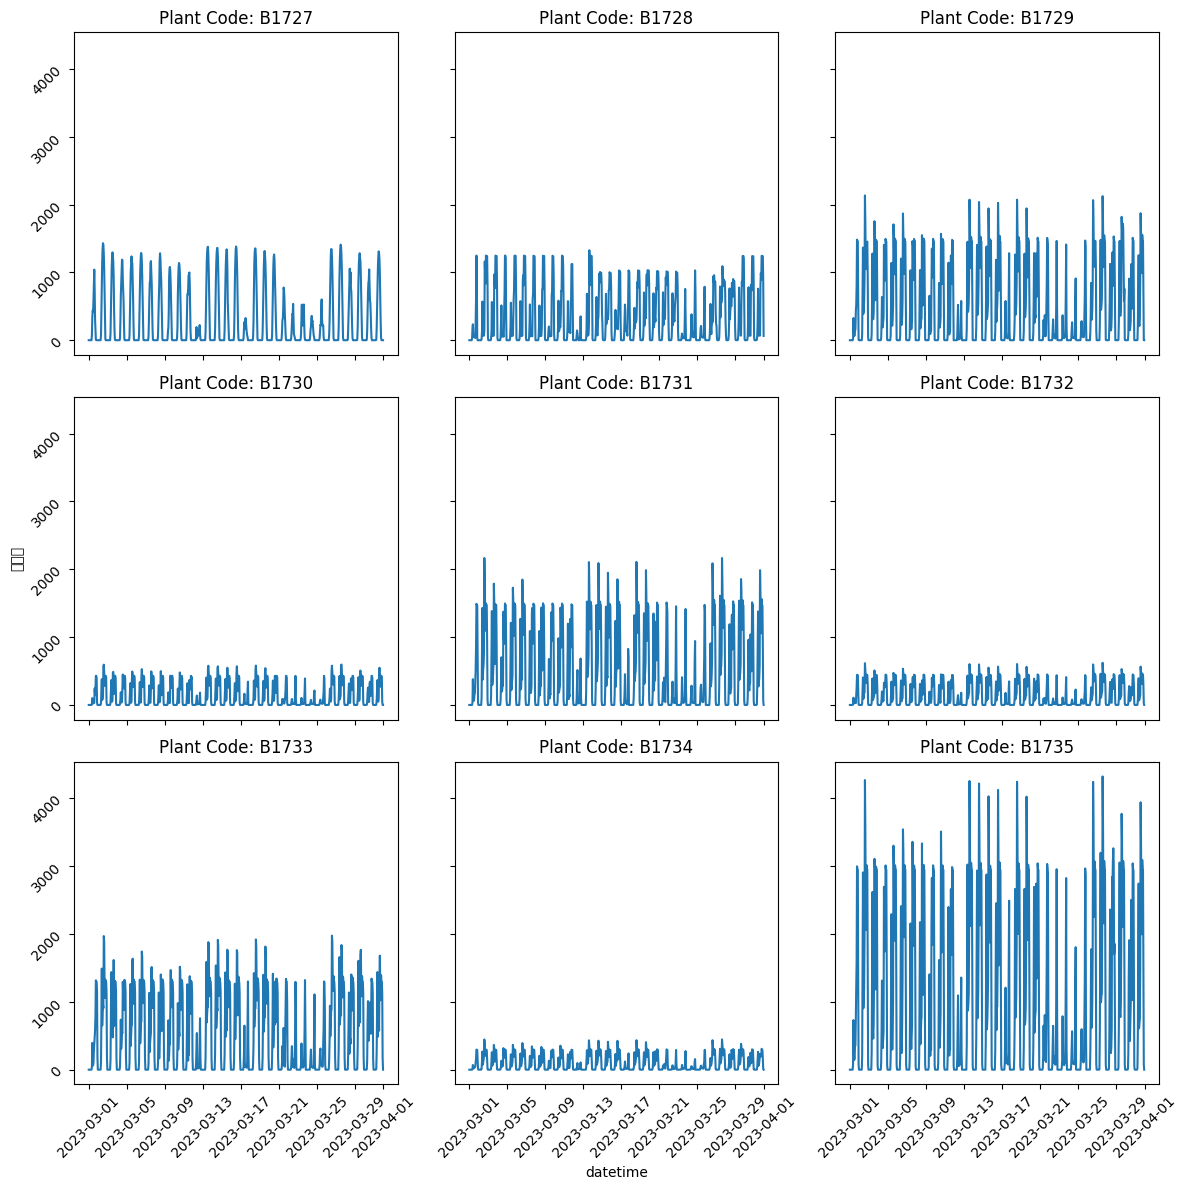

In [30]:
unique_codes = df_combined['발전소코드'].unique() # '발전소코드' 컬럼에서 고유한 값들을 추출하여 배열로 저장합니다.
num_plots = 9
num_rows = 3
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 12), sharex=True, sharey=True)

# unique_codes 배열에서 num_plots 개수만큼의 값에 대해 반복합니다.
for i, code in enumerate(unique_codes[:num_plots]):
    # 현재 반복 인덱스를 이용하여 그래프의 행(row)과 열(col) 위치를 계산합니다.
    row = i // num_cols
    col = i % num_cols

    # df_combined에서 '발전소코드' 컬럼이 현재 코드와 일치하는 행들로 이루어진 부분집합(df_subset)을 만듭니다.
    df_subset = df_combined[df_combined['발전소코드'] == code]

    # axs[row, col]에 대해 그래프를 그립니다. x축은 'datetime', y축은 '실측'으로 설정합니다.
    axs[row, col].plot(df_subset['datetime'], df_subset['실측'])

    # 그래프의 제목을 현재 발전소 코드를 포함한 형식으로 설정합니다.
    axs[row, col].set_title(f'Plant Code: {code}')

    # x축 라벨들을 보기좋게 기울입니다.
    axs[row, col].tick_params(labelrotation=45)



axs[2][1].set_xlabel('datetime')
axs[1][0].set_ylabel('발전량')
plt.tight_layout()
plt.show()

In [31]:
# 발전소 코드 리스트
plant_list = df_combined['발전소코드'].tolist()

# gap 값에 대한 발전소코드별 클러스터링

In [32]:
# 'df_combined' 데이터프레임을 피벗합니다.
# 'datetime'을 인덱스로, '발전소코드'를 컬럼으로, 'gap'을 값으로 사용합니다.
df_pivot = df_combined.pivot(index='datetime', columns='발전소코드', values='gap')
df_pivot

발전소코드,B1727,B1728,B1729,B1730,B1731,B1732,B1733,B1734,B1735,B1736,...,V9018,V9019,V9020,V9021,V9022,V9023,V9024,V9025,V9026,V9027
datetime,,,,,,,,,,,,,,,,,,,,,
2023-03-01 00:00:00,0.000000,0.136882,0.119883,0.188380,0.302346,0.182176,0.103572,0.234221,0.123131,0.0,...,0.0,0.0,0.133881,0.0,0.0,0.0,0.510204,0.426233,0.428359,0.0
2023-03-01 01:00:00,0.000000,0.147929,0.118855,0.185670,0.127838,0.159823,0.102515,0.241319,0.123847,0.0,...,0.0,0.0,0.136737,0.0,0.0,0.0,0.441114,0.419855,0.406037,0.0
2023-03-01 02:00:00,0.000000,0.148890,0.119197,0.185670,0.125808,0.153117,0.104981,0.246642,0.124383,0.0,...,0.0,0.0,0.134595,0.0,0.0,0.0,0.437925,0.423044,0.412415,0.0
2023-03-01 03:00:00,0.000000,0.154173,0.120910,0.184314,0.124794,0.148647,0.105686,0.230672,0.122057,0.0,...,0.0,0.0,0.136023,0.0,0.0,0.0,0.443240,0.418793,0.418793,0.0
2023-03-01 04:00:00,0.000000,0.151291,0.121938,0.184314,0.122427,0.150882,0.102868,0.230672,0.118835,0.0,...,0.0,0.0,0.127811,0.0,0.0,0.0,0.436862,0.427296,0.424107,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 19:00:00,0.001218,2.122877,6.215395,5.720520,5.811879,5.180276,3.309730,4.302926,3.422424,0.0,...,0.0,0.0,2.674045,0.0,0.0,0.0,2.544643,2.076956,0.184949,0.0
2023-03-31 20:00:00,0.000000,2.849554,4.468878,6.226029,5.594420,3.469164,2.196858,3.004063,2.428609,0.0,...,0.0,0.0,1.631560,0.0,0.0,0.0,1.434949,1.020408,0.573980,0.0
2023-03-31 21:00:00,0.000000,3.573830,31.812024,13.964519,24.742676,19.191050,7.569577,24.238338,25.408049,0.0,...,0.0,0.0,31.866833,0.0,0.0,0.0,1.277636,0.913053,0.730230,0.0


In [33]:
# 'df_combined' 데이터프레임을 피벗합니다.
# 'datetime'을 인덱스로, '발전소코드'를 컬럼으로, 'actual_average'를 값으로 사용합니다.
actual_pivot = df_combined.pivot(index='datetime', columns='발전소코드', values='actual_average')

In [34]:
# 'df_combined' 데이터프레임을 피벗합니다.
# 'datetime'을 인덱스로, '발전소코드'를 컬럼으로, 'predict_average'를 값으로 사용합니다.
predict_pivot = df_combined.pivot(index='datetime', columns='발전소코드', values='predict_average')

In [35]:
# 발전소 코드별로 gap값의 평균으로 묶는다
df_error = df_combined.groupby('발전소코드')['gap'].mean().reset_index()
df_error.columns = ['발전소코드', '오차율']

In [36]:
df_error

,발전소코드,오차율
0,B1727,3.438700
1,B1728,6.026710
2,B1729,5.418528
3,B1730,5.603476
4,B1731,6.160718
...,...,...
164,V9023,3.305269
165,V9024,3.466273
166,V9025,3.768443
167,V9026,3.609175


In [37]:
# 'df_error' 데이터프레임에 대한 기술통계 요약을 계산합니다.
df_error.describe()

,오차율
count,169.000000
mean,4.724053
std,3.691884
min,2.541602
25%,3.081273
50%,3.529689
75%,4.634310
max,27.703630


In [38]:
# sklearn 라이브러리
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [39]:
df_error

,발전소코드,오차율
0,B1727,3.438700
1,B1728,6.026710
2,B1729,5.418528
3,B1730,5.603476
4,B1731,6.160718
...,...,...
164,V9023,3.305269
165,V9024,3.466273
166,V9025,3.768443
167,V9026,3.609175


In [40]:
X = df_error['오차율'].values.reshape(-1,1)

## 최적의 클러스터 개수 찾기

### MPTSC-VPPP

 1. Elbow

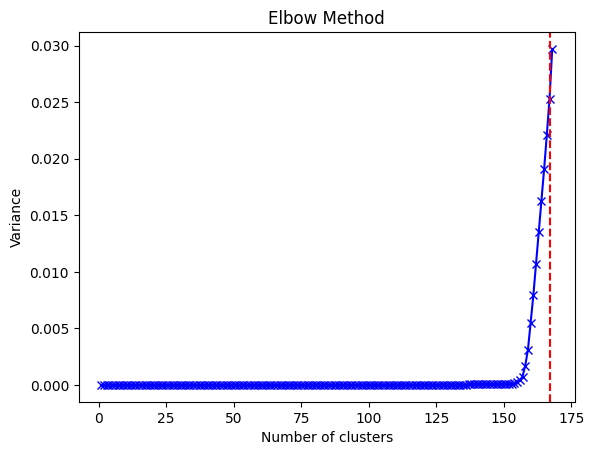

In [41]:
# NearestNeighbors 라이브러리
from sklearn.neighbors import NearestNeighbors

# 특성 스케일링
scaler = StandardScaler()

X = df_error['오차율'].values.reshape(-1,1)
df_error['오차율'] = scaler.fit_transform(X)
scaled_features2 = scaler.fit_transform(X)

# 5-NN 거리 계산합니다.
n_neighbors = 4
neighbors = NearestNeighbors(n_neighbors=n_neighbors)
distances, _ = neighbors.fit(scaled_features2).kneighbors(scaled_features2)

# 거리 기준으로 샘플 정렬합니다.
sorted_distances = np.sort(distances[:, -1])

# 엘보우 메소드를 통한 최적의 클러스터 개수 추정합니다.
variances = []
for i in range(1, len(sorted_distances)):
    variances.append(np.var(sorted_distances[:i]))

# 엘보우 메소드 계산합니다.
diff = np.diff(variances)
knee = np.argmax(diff) + 1

# 시각화
plt.plot(range(1, len(sorted_distances)), variances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Variance')
plt.title('Elbow Method')
plt.axvline(knee, color='r', linestyle='--')
plt.show()

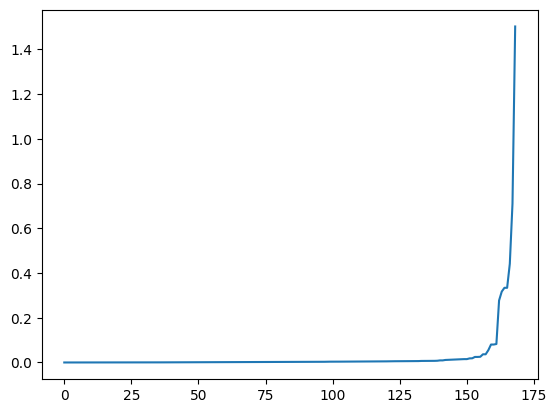

In [42]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_features2)
distances, indices = neighbors_fit.kneighbors(scaled_features2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [43]:
distances

array([1.42455383e-05, 1.42455383e-05, 1.93215532e-05, 1.93215532e-05,
       3.78494668e-05, 3.78494668e-05, 8.36886205e-05, 8.36886205e-05,
       8.47308718e-05, 8.47308718e-05, 8.94130945e-05, 8.94130945e-05,
       1.06308912e-04, 1.06308912e-04, 1.11478774e-04, 1.11478774e-04,
       1.26912227e-04, 1.26912227e-04, 1.28601302e-04, 1.28601302e-04,
       1.29938498e-04, 1.53716908e-04, 1.53716908e-04, 2.19658291e-04,
       2.68210910e-04, 2.68210910e-04, 2.79419407e-04, 2.79419407e-04,
       3.66325591e-04, 3.66325591e-04, 3.71594475e-04, 3.71594475e-04,
       3.85943897e-04, 4.92043128e-04, 4.92043128e-04, 5.07244836e-04,
       5.07244836e-04, 5.45574301e-04, 5.45574301e-04, 5.77765186e-04,
       6.23024252e-04, 6.23024252e-04, 6.43067998e-04, 6.50210854e-04,
       6.50210854e-04, 7.25934803e-04, 7.25934803e-04, 8.20787568e-04,
       8.20787568e-04, 8.79318382e-04, 9.10185555e-04, 9.10185555e-04,
       9.74329269e-04, 9.74329269e-04, 1.00600263e-03, 1.02052680e-03,
      

In [44]:
#eps = distances[130:]

#output = []

#for ep in eps:
#    labels = DBSCAN(min_samples=4, eps = ep, metric='euclidean').fit_predict(scaled_features2)

#    score = silhouette_score(scaled_features2, labels)
#    output.append((4, ep, score))

#output.sort(key=lambda x:-x[2])

## 클러스터링 알고리즘 적용

### MPTSC-VPPP

---



In [45]:
from sklearn.cluster import DBSCAN
from numpy import where
from numpy import unique
import matplotlib.pyplot as plt
from sklearn import metrics

In [46]:
""" 표준화된 오차율 데이터를 사용하여 DBSCAN (Density-Based Spatial Clustering of Applications with Noise) 알고리즘을 적용하고,
군집화된 결과를 산점도 그래프로 시각화하는 작업을 수행합니다. """

scaler = StandardScaler()

X = df_error['오차율'].values.reshape(-1,1)
df_error['오차율'] = scaler.fit_transform(X)
scaled_features2 = scaler.fit_transform(X)

In [47]:
scaled_features2

array([[-3.49191150e-01],
       [ 3.53892051e-01],
       [ 1.88667464e-01],
       [ 2.38912371e-01],
       [ 3.90297880e-01],
       [-5.56967654e-03],
       [ 1.08789304e-01],
       [ 1.81621750e-01],
       [ 4.99873111e-02],
       [-5.10828547e-01],
       [-2.89145601e-01],
       [-1.07546793e-01],
       [-2.52725669e-01],
       [-2.43803472e-02],
       [ 1.33576227e-01],
       [ 4.34189958e-01],
       [ 7.05833894e-01],
       [-3.05632222e-01],
       [-4.41167223e-01],
       [-2.68201260e-01],
       [-4.02053950e-01],
       [-4.05584358e-01],
       [-4.29311303e-01],
       [ 4.37996556e-01],
       [ 6.14216602e-01],
       [ 3.39587495e-02],
       [-8.17010219e-02],
       [-3.04499307e-01],
       [ 5.00720420e-02],
       [-3.27415250e-02],
       [-3.78857245e-01],
       [-4.88558955e-01],
       [-3.13448861e-01],
       [-3.35739235e-01],
       [-5.92905253e-01],
       [-5.48899733e-01],
       [-3.05505310e-01],
       [-5.51859694e-01],
       [-3.8

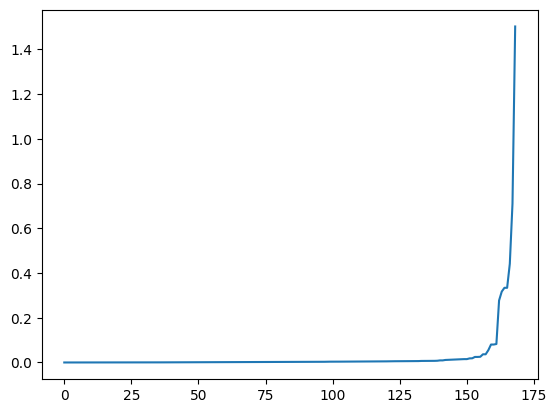

In [48]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [49]:
distances

array([1.42455383e-05, 1.42455383e-05, 1.93215532e-05, 1.93215532e-05,
       3.78494668e-05, 3.78494668e-05, 8.36886205e-05, 8.36886205e-05,
       8.47308718e-05, 8.47308718e-05, 8.94130945e-05, 8.94130945e-05,
       1.06308912e-04, 1.06308912e-04, 1.11478774e-04, 1.11478774e-04,
       1.26912227e-04, 1.26912227e-04, 1.28601302e-04, 1.28601302e-04,
       1.29938498e-04, 1.53716908e-04, 1.53716908e-04, 2.19658291e-04,
       2.68210910e-04, 2.68210910e-04, 2.79419407e-04, 2.79419407e-04,
       3.66325591e-04, 3.66325591e-04, 3.71594475e-04, 3.71594475e-04,
       3.85943897e-04, 4.92043128e-04, 4.92043128e-04, 5.07244836e-04,
       5.07244836e-04, 5.45574301e-04, 5.45574301e-04, 5.77765186e-04,
       6.23024252e-04, 6.23024252e-04, 6.43067998e-04, 6.50210854e-04,
       6.50210854e-04, 7.25934803e-04, 7.25934803e-04, 8.20787568e-04,
       8.20787568e-04, 8.79318382e-04, 9.10185555e-04, 9.10185555e-04,
       9.74329269e-04, 9.74329269e-04, 1.00600263e-03, 1.02052680e-03,
      

In [50]:
df_error['오차율']

0     -0.349191
1      0.353892
2      0.188667
3      0.238912
4      0.390298
         ...   
164   -0.385440
165   -0.341700
166   -0.259610
167   -0.302878
168   -0.490615
Name: 오차율, Length: 169, dtype: float64

In [51]:
# 역정규화 수행
df_error['오차율'] = scaler.inverse_transform(scaled_features2.reshape(-1,1))
inverse_error = df_error['오차율'].values.reshape(-1,1)
print(inverse_error)

[[-3.49191150e-01]
 [ 3.53892051e-01]
 [ 1.88667464e-01]
 [ 2.38912371e-01]
 [ 3.90297880e-01]
 [-5.56967654e-03]
 [ 1.08789304e-01]
 [ 1.81621750e-01]
 [ 4.99873111e-02]
 [-5.10828547e-01]
 [-2.89145601e-01]
 [-1.07546793e-01]
 [-2.52725669e-01]
 [-2.43803472e-02]
 [ 1.33576227e-01]
 [ 4.34189958e-01]
 [ 7.05833894e-01]
 [-3.05632222e-01]
 [-4.41167223e-01]
 [-2.68201260e-01]
 [-4.02053950e-01]
 [-4.05584358e-01]
 [-4.29311303e-01]
 [ 4.37996556e-01]
 [ 6.14216602e-01]
 [ 3.39587495e-02]
 [-8.17010219e-02]
 [-3.04499307e-01]
 [ 5.00720420e-02]
 [-3.27415250e-02]
 [-3.78857245e-01]
 [-4.88558955e-01]
 [-3.13448861e-01]
 [-3.35739235e-01]
 [-5.92905253e-01]
 [-5.48899733e-01]
 [-3.05505310e-01]
 [-5.51859694e-01]
 [-3.89362517e-01]
 [-3.12310165e-01]
 [-3.88096425e-01]
 [-1.98652494e-01]
 [-2.99310449e-01]
 [-3.55069952e-01]
 [ 4.60812870e-01]
 [-2.21327390e-01]
 [ 3.86006213e-02]
 [-5.06034382e-01]
 [-4.17171114e-01]
 [-5.73608801e-01]
 [ 2.51126728e+00]
 [-4.92060311e-02]
 [-3.6763577

In [52]:
import itertools


error_list = inverse_error.tolist()

error_list2 =  list(itertools.chain(*error_list))
print(error_list2)

[-0.3491911500642025, 0.3538920505357704, 0.1886674638640269, 0.23891237141140972, 0.39029788014200917, -0.005569676535975281, 0.10878930428763653, 0.18162174972239198, 0.04998731112964766, -0.5108285472414118, -0.289145600721886, -0.10754679319097438, -0.25272566923226386, -0.02438034717357878, 0.13357622728465324, 0.43418995807307376, 0.7058338935897693, -0.3056322223445309, -0.44116722336896436, -0.2682012604358492, -0.4020539504358309, -0.40558435756017686, -0.4293113031823219, 0.43799655556705536, 0.6142166023132687, 0.033958749530260034, -0.08170102187415425, -0.3044993074908553, 0.050072042001475754, -0.032741524976037474, -0.37885724529918874, -0.48855895499385066, -0.3134488605830968, -0.3357392353633364, -0.5929052532716858, -0.5488997330485832, -0.30550531011707543, -0.5518596935509377, -0.3893625171601321, -0.312310164752097, -0.38809642490995105, -0.1986524938324691, -0.29931044941250534, -0.35506995199774327, 0.4608128703214795, -0.2213273903006692, 0.038600621292511975, 

In [53]:
error_list3 = []

for arr in error_list2:
  if arr <= 6:
    error_list3.append(4)
  elif arr <= 8:
    error_list3.append(3)
  else:
    error_list3.append(0)

for e in error_list3:
  print(e)

# print(error_list3)


4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


In [54]:
# eps = distances[58:]

# output = []

# for ep in eps:
#   labels = DBSCAN(min_samples=5, eps = ep, metric='euclidean').fit_predict(X)
#   unique_labels = len(set(labels))
#   if unique_labels == 6:
#     score = silhouette_score(X, labels)
#     output.append((5, ep, score))

# output.sort(key=lambda x:-x[2])

In [55]:
# print(output)

In [56]:
dbscan = DBSCAN(eps=0.01872753085963805, min_samples=5)
db_result = dbscan.fit_predict(scaled_features2)
db_label = dbscan.labels_
db_label[db_label == -1] = 5
df_error['클러스터'] = db_label

In [57]:
print(X)

[[-3.49191150e-01]
 [ 3.53892051e-01]
 [ 1.88667464e-01]
 [ 2.38912371e-01]
 [ 3.90297880e-01]
 [-5.56967654e-03]
 [ 1.08789304e-01]
 [ 1.81621750e-01]
 [ 4.99873111e-02]
 [-5.10828547e-01]
 [-2.89145601e-01]
 [-1.07546793e-01]
 [-2.52725669e-01]
 [-2.43803472e-02]
 [ 1.33576227e-01]
 [ 4.34189958e-01]
 [ 7.05833894e-01]
 [-3.05632222e-01]
 [-4.41167223e-01]
 [-2.68201260e-01]
 [-4.02053950e-01]
 [-4.05584358e-01]
 [-4.29311303e-01]
 [ 4.37996556e-01]
 [ 6.14216602e-01]
 [ 3.39587495e-02]
 [-8.17010219e-02]
 [-3.04499307e-01]
 [ 5.00720420e-02]
 [-3.27415250e-02]
 [-3.78857245e-01]
 [-4.88558955e-01]
 [-3.13448861e-01]
 [-3.35739235e-01]
 [-5.92905253e-01]
 [-5.48899733e-01]
 [-3.05505310e-01]
 [-5.51859694e-01]
 [-3.89362517e-01]
 [-3.12310165e-01]
 [-3.88096425e-01]
 [-1.98652494e-01]
 [-2.99310449e-01]
 [-3.55069952e-01]
 [ 4.60812870e-01]
 [-2.21327390e-01]
 [ 3.86006213e-02]
 [-5.06034382e-01]
 [-4.17171114e-01]
 [-5.73608801e-01]
 [ 2.51126728e+00]
 [-4.92060311e-02]
 [-3.6763577

In [58]:
# 클러스터의 수를 계산합니다.

sample_cores=np.zeros_like(db_label,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True

n_clusters=len(set(db_label))- (1 if -1 in db_label else 0)
print('No of clusters:',n_clusters)

No of clusters: 6


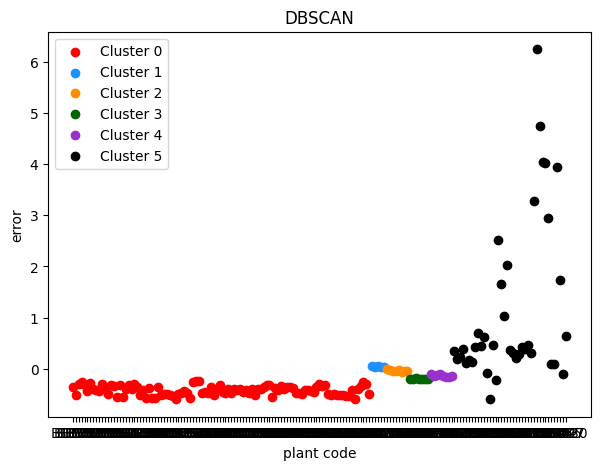

In [59]:
plt.figure(figsize=(7,5))

cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []


colors = ['red', 'dodgerblue', 'darkorange', 'darkgreen', 'darkorchid', 'black']

# 각 클러스터에 대한 그래프를 시각화 합니다.
for cluster_id in range(0,6, 1):
    cluster = df_error[df_error['클러스터'] == cluster_id]
    plt.scatter(cluster['발전소코드'], cluster['오차율'], color=colors[cluster_id], label='Cluster {}'.format(cluster_id))


plt.xlabel('plant code')
plt.ylabel('error')
plt.title('DBSCAN')
plt.legend()
plt.show()

In [60]:
cluster

,발전소코드,오차율,클러스터
1,B1728,0.353892,5
2,B1729,0.188667,5
3,B1730,0.238912,5
4,B1731,0.390298,5
6,B1733,0.108789,5
7,B1734,0.181622,5
14,B1741,0.133576,5
15,B1742,0.434190,5
16,B1743,0.705834,5
23,B1782,0.437997,5


In [61]:
db_label.tolist()

[0,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 1,
 0,
 0,
 4,
 0,
 2,
 5,
 5,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 5,
 1,
 5,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 5,
 5,
 1,
 0,
 0,
 0,
 5,
 2,
 0,
 5,
 3,
 3,
 0,
 0,
 0,
 1,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 5,
 5,
 5,
 2,
 4,
 4,
 4,
 0,
 5,
 5,
 5,
 5,
 2,
 0,
 3,
 4,
 5,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 4,
 4,
 0,
 3,
 5,
 5,
 5,
 3,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 5,
 5,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 5,
 2,
 5,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [62]:
# # 각 클러스터의 9시 ~ 16시 오차율 평균
# print(cluster0[0][9:17])
# print(cluster1[0][9:17])
# print(cluster2[0][9:17])
# print(cluster3[0][9:17])
# print(cluster4[0][9:17])
# print(cluster5[0][9:17])

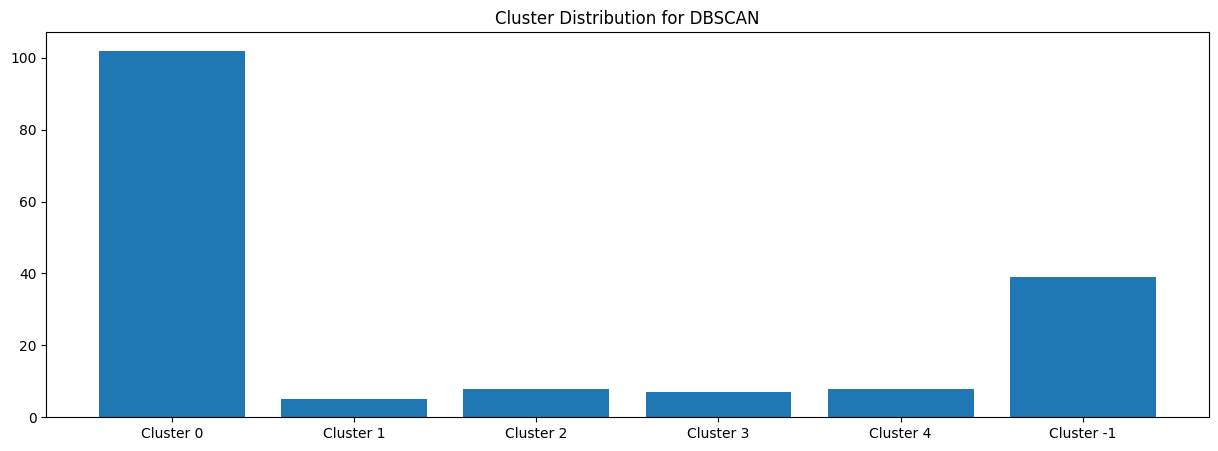

In [63]:
cluster_c = [len(db_label[db_label==i]) for i in range(len(set(db_label)))]
# cluster_c.append(len(db_label[labels==6]))

cluster_n = ["Cluster "+str(i) for i in range(len(set(db_label))-1)]
cluster_n.append("Cluster "+str(-1))
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for DBSCAN")
plt.bar(cluster_n,cluster_c)
plt.show()

In [64]:
cluster_c

[102, 5, 8, 7, 8, 39]

In [65]:
fancy_names_for_labels = [f"Cluster {label}" for label in db_label]
p = pd.DataFrame(zip(plant_list,fancy_names_for_labels),columns=["plant code","Cluster"]).sort_values(by="Cluster").set_index("Cluster")
p = p.sort_index()

In [66]:
p

,plant code
Cluster,
Cluster 0,B1727
Cluster 0,S5032
Cluster 0,S5030
Cluster 0,S5029
Cluster 0,S5028
...,...
Cluster 5,S5045
Cluster 5,S5047
Cluster 5,B1785


In [67]:
db_df = pd.DataFrame({
    'Cluster_0' : p['plant code'][0:cluster_c[0]],
    # "Cluster_1" : p['plant code'][cluster_c[0]:cluster_c[0]+cluster_c[1]],
    # "Cluster_2" : p['plant code'][cluster_c[0]+cluster_c[1]:cluster_c[0]+cluster_c[1] + cluster_c[2]],
    # "Cluster_3" : p['plant code'][cluster_c[0]+cluster_c[1] + cluster_c[2]:cluster_c[0]+cluster_c[1] + cluster_c[2] + cluster_c[3]],
    # "Cluster_4" : p['plant code'][cluster_c[0]+cluster_c[1] + cluster_c[2] + cluster_c[3]:cluster_c[0]+cluster_c[1] + cluster_c[2] + cluster_c[3] + cluster_c[4]],
    # "Cluster_5" : p['plant code'][cluster_c[0]+cluster_c[1] + cluster_c[2] + cluster_c[3] + cluster_c[4]:cluster_c[0]+cluster_c[1] + cluster_c[2] + cluster_c[3] + cluster_c[4] + cluster_c[5]],
})

outlier = db_df.values.tolist()
db_df

,Cluster_0
Cluster,
Cluster 0,B1727
Cluster 0,S5032
Cluster 0,S5030
Cluster 0,S5029
Cluster 0,S5028
...,...
Cluster 0,G1051
Cluster 0,G1052
Cluster 0,G1054


In [68]:
flat_list = [item for sublist in outlier for item in sublist] # 리스트화
for f in flat_list:
  print(f)
# print(flat_list)

B1727
S5032
S5030
S5029
S5028
S5027
S5026
S5020
S5017
S5016
S5015
S5014
S5012
S5011
S5010
S5009
S5008
S5007
S5005
S5004
S5003
S5002
S5001
N6009
N6004
V9026
M1206
G1066
G1065
G1063
S5033
S5037
S5038
S5039
V9025
V9024
V9023
V9022
V9021
V9019
V9018
V9017
V9016
V9015
V9014
V9013
V9012
V9011
G1062
V9010
V9008
V9007
V9006
V9005
V9004
V9003
V9002
V9001
S5050
S5049
S5048
S5046
S5041
S5040
V9009
G1061
V9027
G1059
G1028
G1027
G1023
G1022
G1060
G1019
G1018
G1017
B1795
B1794
B1792
G1029
B1791
B1789
B1786
B1781
B1780
B1779
B1778
B1777
B1776
B1739
B1737
B1736
B1790
G1032
G1020
G1056
G1050
G1051
G1052
G1054
G1058
G1057


In [69]:
db_df

,Cluster_0
Cluster,
Cluster 0,B1727
Cluster 0,S5032
Cluster 0,S5030
Cluster 0,S5029
Cluster 0,S5028
...,...
Cluster 0,G1051
Cluster 0,G1052
Cluster 0,G1054


In [71]:
total = 0
sum = 0
for i in flat_list:
  sum += (df_actual[i][9] + df_actual[i][10] + df_actual[i][11] + df_actual[i][12] + df_actual[i][13] + df_actual[i][14] + df_actual[i][15] + df_actual[i][16])
  if cluster.loc[cluster['발전소코드'] == i, '오차율'].values.astype(np.float64)[0] <=6.0:
    total = sum * 4
    sum = 0
  elif cluster.loc[cluster['발전소코드'] == i, '오차율'].values.astype(np.float64)[0] <=8.0:
    total = sum * 3
    sum = 0
  else:
    total = sum * 0
    sum = 0
print(total)

IndexError: ignored

In [ ]:
# 특성 스케일링
scaler = StandardScaler()

X = df_error['오차율'].values.reshape(-1,1)
print(X)

df_error['오차율'] = scaler.fit_transform(X)
X= df_error['오차율'].values.reshape(-1, 1)
scaled_features2 = scaler.transform(X)
print(scaled_features2)

In [ ]:
cluster

In [ ]:
a= cluster.loc[cluster['발전소코드'] == "G1033", '오차율'].values.astype(np.float64)[0]
print(a)